# XAI examples

This notebook is based on three modules, InterpretML, Lime and Shap.

Examples are from labs where possible, while LSTMs aere not always possible. 

- https://github.com/interpretml/interpret/tree/develop

- https://github.com/marcotcr/lime

- https://github.com/slundberg/shap


## Tabular Data

### Adult Dataset

Note, this dataset containes numerical and categorical, thus the method is not as simple as numeric only.

In [8]:
from __future__ import print_function

import pandas as pd
import matplotlib.pyplot as plt
from numpy import*
from sklearn import*

import warnings
warnings.filterwarnings('ignore')


# sklearn 10FCV
from sklearn.preprocessing import LabelEncoder
import sklearn.preprocessing

# Keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

#XAI
import lime
import lime.lime_tabular
import shap

seed = 1
# fix random seed for reproducibility
np.random.seed(seed)
tf.random.set_seed(seed)

plt.rcParams["figure.figsize"] = (12,8)

In [9]:
filename = "../Week 03/adult.csv"
data = pd.read_csv(filename)

# Used to label encode categorical values
feature_names = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Marital Status","Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss","Hours per week", "Country"]

dataT = data.values

labels = dataT[:,14]
le= sklearn.preprocessing.LabelEncoder()
le.fit(labels)
labels = le.transform(labels)
class_names = le.classes_
dataT = dataT[:,:-1]



categorical_features = [1,3,5,6,7,8,9,13]


categorical_names = {}
for feature in categorical_features:
    le = sklearn.preprocessing.LabelEncoder()
    le.fit(dataT[:, feature])
    dataT[:, feature] = le.transform(dataT[:, feature])
    categorical_names[feature] = le.classes_

In [10]:
dataT = dataT.astype(float)

np.random.seed(1)
train, test, labels_train, labels_test = sklearn.model_selection.train_test_split(dataT, labels, train_size=0.80)

# One could also hot encode here

Train on 17452 samples, validate on 8596 samples
Epoch 1/10
17452/17452 [==============================] - 1s 57us/sample - loss: 5389.0825 - acc: 0.7597 - val_loss: 949.5029 - val_acc: 0.7612
Epoch 2/10
17452/17452 [==============================] - 0s 7us/sample - loss: 271.5892 - acc: 0.6233 - val_loss: 170.1086 - val_acc: 0.7648
Epoch 3/10
17452/17452 [==============================] - 0s 7us/sample - loss: 68.1560 - acc: 0.6898 - val_loss: 5.9480 - val_acc: 0.7804
Epoch 4/10
17452/17452 [==============================] - 0s 6us/sample - loss: 27.4280 - acc: 0.6610 - val_loss: 24.8146 - val_acc: 0.7927
Epoch 5/10
17452/17452 [==============================] - 0s 6us/sample - loss: 21.5547 - acc: 0.6932 - val_loss: 10.3526 - val_acc: 0.2621
Epoch 6/10
17452/17452 [==============================] - 0s 6us/sample - loss: 13.0447 - acc: 0.6938 - val_loss: 5.2820 - val_acc: 0.7793
Epoch 7/10
17452/17452 [==============================] - 0s 6us/sample - loss: 24.6205 - acc: 0.6785 - val

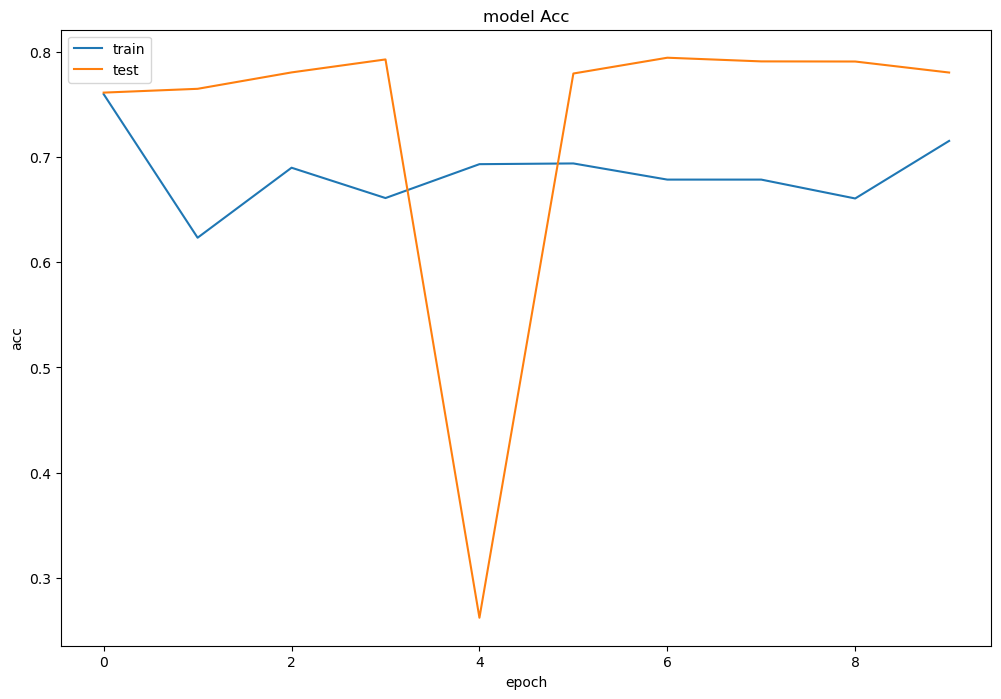

In [11]:
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed) # for TF this needs to be run per cell.


model = Sequential()
model.add(Dense(100, input_dim=14, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['acc'])

# Fit the model, but this time store the history (that is accuracy and loss for each Epoch)
results = model.fit(train, labels_train, validation_split=0.33, epochs=10, batch_size=1000, verbose=1, shuffle=True)


# summarize history for loss
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model Acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Lime - Single prediction
(https://github.com/marcotcr/lime)

In [12]:
explainer = lime.lime_tabular.LimeTabularExplainer(train,feature_names = feature_names,class_names=class_names,
                                                   categorical_features=categorical_features, 
                                                   categorical_names=categorical_names, kernel_width=3)

exp = explainer.explain_instance(test[1], model.predict, num_features=5)
exp.show_in_notebook(show_all=True)

### Shap - explianing a model
https://github.com/slundberg/shap

Note: Shap needs numpy==1.22.3 (or at least <1.24)

Note: these are model agnostic (we could have used DeepExplainer)
Model agnostic example with KernelExplainer (explains any function)

In [13]:
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())
import numpy as np
from sklearn.model_selection import train_test_split

from interpret import show
from interpret.blackbox import ShapKernel

# This can be very compute consuming and OOM erros
shapML = ShapKernel(model, train[:100])
shap_local = shapML.explain_local(test[:5], labels_test[:5])

# For some reason they are not printing in notebook
for i in range(len(test[:5])): 
    shap_local.visualize(i).write_html("graph"+str(i)+".html")


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



AttributeError: Tensor.name is meaningless when eager execution is enabled.

In [ ]:
xplainer = shap.KernelExplainer(model, train[:200])
shap_values = xplainer.shap_values(test[:5])

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/5 [00:00<?, ?it/s]

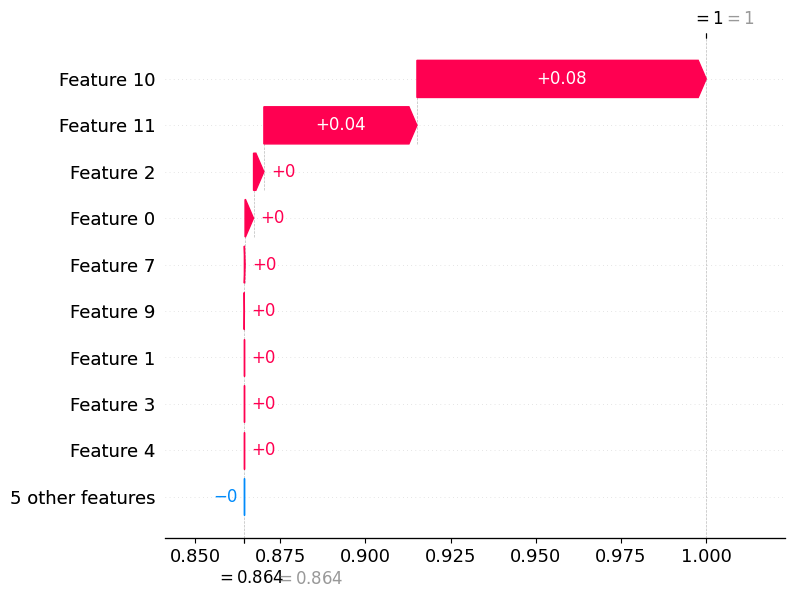

In [ ]:
shap.initjs()
shap.plots._waterfall.waterfall_legacy(xplainer.expected_value[0], shap_values[0][0])

In [ ]:
shap.initjs()
shap.plots.force(xplainer.expected_value[0], shap_values[0][0])

### For all features

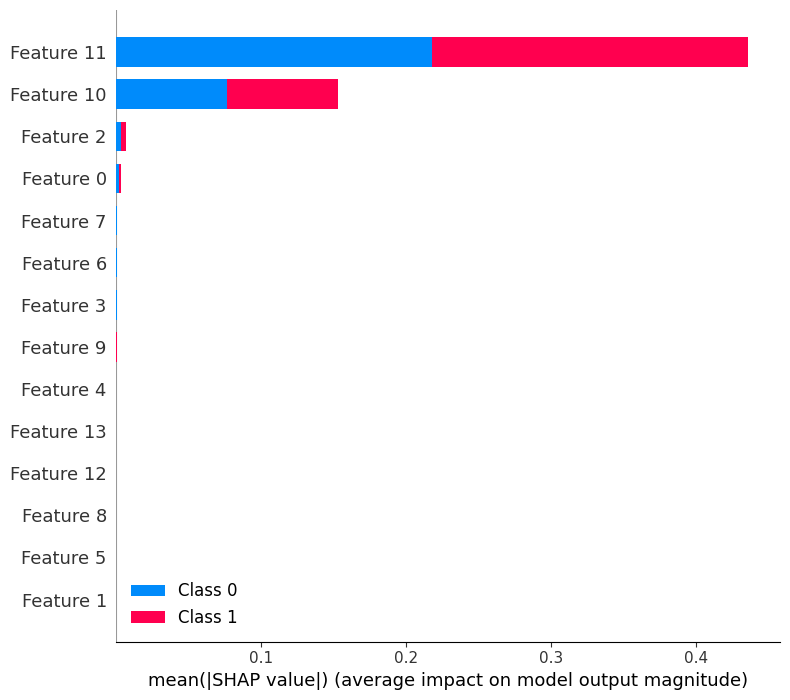

In [ ]:
shap.summary_plot(shap_values, test, plot_type="bar")

## Images

### Dogs from Lab

Note this is similar to the approaches used with saliency maps.

In [ ]:
# Tensorflow 2
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten


import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline  

from PIL import Image
import glob

In [ ]:
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

# 64 and bigger ran into an OOM
w = 64
h = 64

# Load data
X =[]
Y =[]

for filename in glob.glob('jrDogs/*.jpg'):
    # Convert each image to greay scale
    im=Image.open(filename)
    
    # Resize the images
    im = im.resize((w,h),Image.ANTIALIAS)
    
    # Convert to numpy array
    arr = np.array(im)
    
    # add images and class to the two lists
    X.append(arr)
    Y.append(0)  # Jack russel class 

# same below
for filename in glob.glob('rrDogs/*.jpg'):
    im=Image.open(filename)
    im = im.resize((w,h),Image.ANTIALIAS)
    arr = np.array(im)
    X.append(arr)
    Y.append(1)  # Ridgeback class


    
# Convert to NP array
X = np.array(X)


# reshape to be [samples][channels][width][height]
X = X.reshape(X.shape[0], w, h, 3).astype('float32')

# Normalize the data
X = X /255

# one hot encode outputs
Y = np.array(Y)

# randomize the data set - numpy arrays
randomize = np.arange(len(X))
np.random.shuffle(randomize)
X = X[randomize]
Y = Y[randomize]


Y = to_categorical(Y)
num_classes = Y.shape[1]

Epoch 1/10
8/8 [==============================] - 4s 38ms/step - loss: 4.9900 - acc: 0.5348 - val_loss: 1.7689 - val_acc: 0.4649
Epoch 2/10
8/8 [==============================] - 0s 13ms/step - loss: 2.0315 - acc: 0.5217 - val_loss: 0.9583 - val_acc: 0.5351
Epoch 3/10
8/8 [==============================] - 0s 14ms/step - loss: 0.8515 - acc: 0.5826 - val_loss: 0.8418 - val_acc: 0.5439
Epoch 4/10
8/8 [==============================] - 0s 12ms/step - loss: 0.5928 - acc: 0.6783 - val_loss: 0.6171 - val_acc: 0.6140
Epoch 5/10
8/8 [==============================] - 0s 11ms/step - loss: 0.5032 - acc: 0.7826 - val_loss: 0.6586 - val_acc: 0.6491
Epoch 6/10
8/8 [==============================] - 0s 12ms/step - loss: 0.4642 - acc: 0.7870 - val_loss: 0.5371 - val_acc: 0.7105
Epoch 7/10
8/8 [==============================] - 0s 13ms/step - loss: 0.3785 - acc: 0.8783 - val_loss: 0.4982 - val_acc: 0.7807
Epoch 8/10
8/8 [==============================] - 0s 11ms/step - loss: 0.2817 - acc: 0.9348 - val

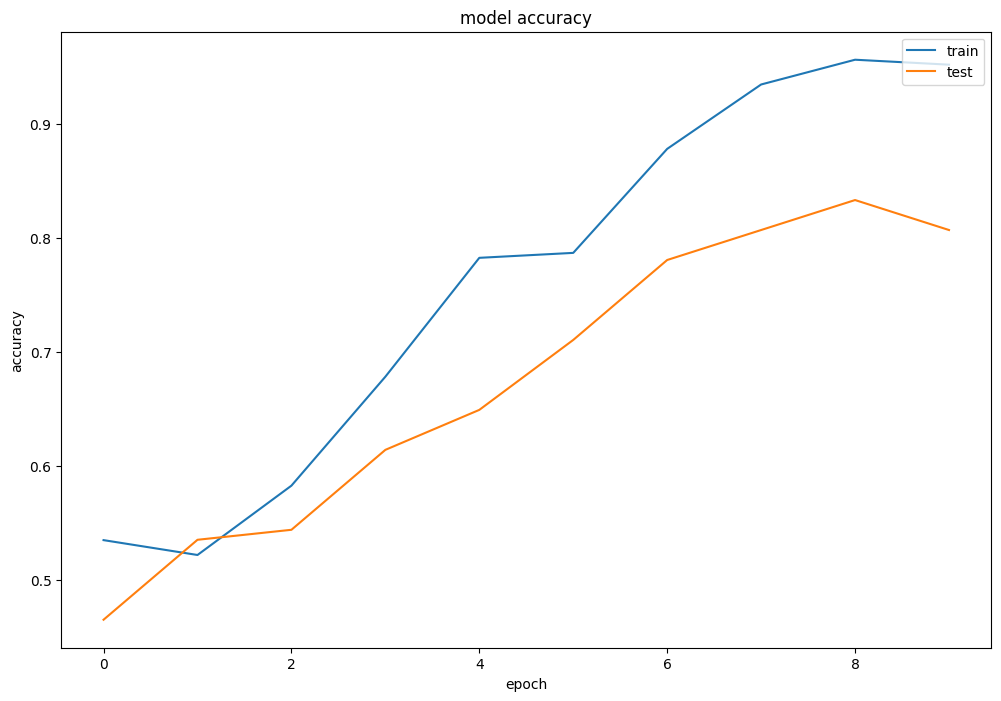

In [ ]:
np.random.seed(10)
tf.random.set_seed(10)

modelC = Sequential()
modelC.add(Conv2D(32, (3, 3), strides=1, padding="valid", input_shape=(w, h,3), activation='relu',))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))

modelC.add(Flatten())
modelC.add(Dense(128, activation='relu'))
modelC.add(Dense(num_classes, activation='softmax'))


modelC.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = modelC.fit(X, Y, validation_split=0.33, epochs=10, batch_size=32, verbose=1)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## Lime

In [ ]:
from lime import lime_image
from skimage.segmentation import mark_boundaries

explainer = lime_image.LimeImageExplainer(random_state=1)

def make_prediction(image):
    preds = modelC.predict(image)
    return preds

explanation = explainer.explain_instance(X[0].squeeze(), make_prediction, random_seed=1)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step


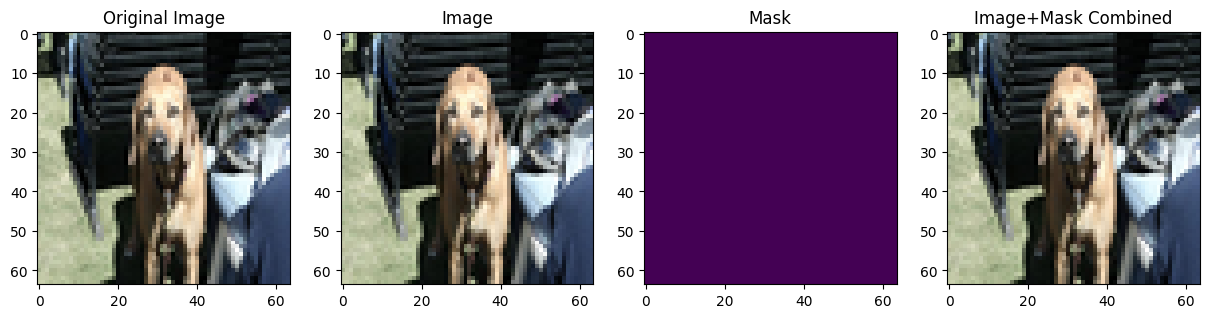

In [ ]:
#as we used OHE we need to get class value: np.argmax(Y[0])
img, mask = explanation.get_image_and_mask(np.argmax(Y[0]), positive_only=True, hide_rest=True)

from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

def plot_comparison(main_image, img, mask):
    fig = plt.figure(figsize=(15,5))

    ax = fig.add_subplot(141)
    ax.imshow(main_image, cmap="gray");
    ax.set_title("Original Image")
    ax = fig.add_subplot(142)
    ax.imshow(img);
    ax.set_title("Image")
    ax = fig.add_subplot(143)
    ax.imshow(mask);
    ax.set_title("Mask")
    ax = fig.add_subplot(144)
    ax.imshow(mark_boundaries(img, mask, color=(0,1,0)));
    ax.set_title("Image+Mask Combined");

plot_comparison(X[0], img, mask)

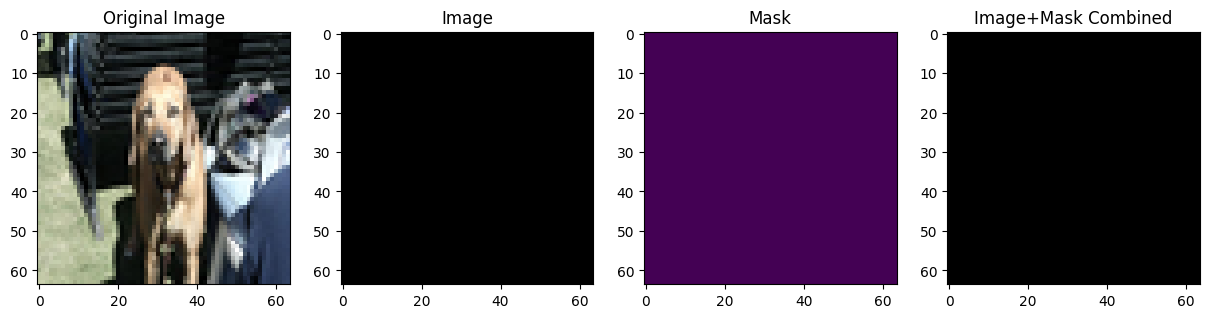

In [ ]:
#as we used OHE we need to get class value: np.argmax(Y[0])
img, mask = explanation.get_image_and_mask(np.argmax(Y[0]), positive_only=False,negative_only=True, hide_rest=True)

plot_comparison(X[0], img, mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


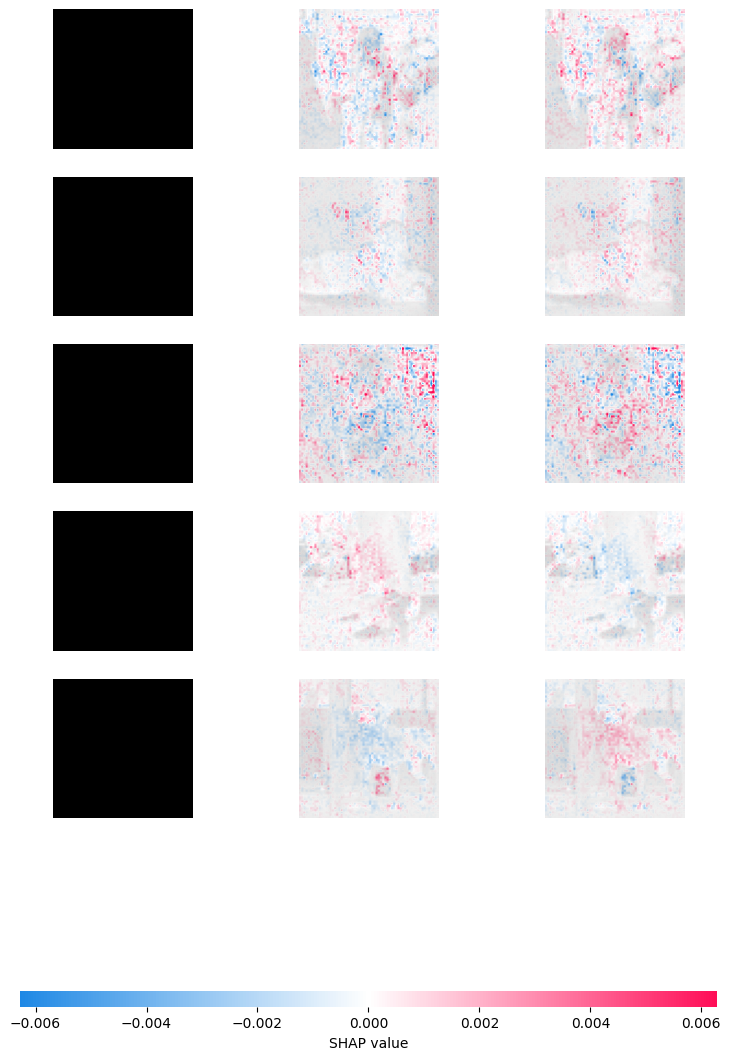

In [ ]:
xplainer = shap.DeepExplainer(modelC, X[:10])
shap_values = xplainer.shap_values(X[0:5]) 

shap.image_plot(shap_values, -X[0:5])

## Time Series

### Power consumption

Note Shap and Lime are very restrictive with LSTMs

In [ ]:
import pandas as pd
import numpy as np

import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from numpy import array

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

seed = 1
numpy.random.seed(seed)
tf.random.set_seed(seed)


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

data = pd.read_csv("powerconsumption.csv")

dataSV =  data["PowerConsumption_Zone1"].dropna().iloc[:1000]

data_columns = ['PowerConsumption_Zone1']

dataSV.describe()

count     1000.000000
mean     30084.291646
std       7060.738360
min      18045.569620
25%      23641.518990
50%      29908.860755
75%      34014.683547
max      43831.898730
Name: PowerConsumption_Zone1, dtype: float64

Epoch 1/5


2023-07-06 13:47:45.075487: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-06 13:47:45.077115: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-06 13:47:45.078076: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

132/132 [==============================] - 5s 5ms/step - loss: 0.0958
Epoch 2/5
132/132 [==============================] - 1s 4ms/step - loss: 0.0072
Epoch 3/5
132/132 [==============================] - 1s 4ms/step - loss: 0.0052
Epoch 4/5
132/132 [==============================] - 1s 4ms/step - loss: 0.0039
Epoch 5/5
10/10 [==============================] - 0s 2ms/step


2023-07-06 13:47:52.405229: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-06 13:47:52.406459: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-06 13:47:52.407833: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Train Score: 1308.68 RMSE
Test Score: 1453.20 RMSE


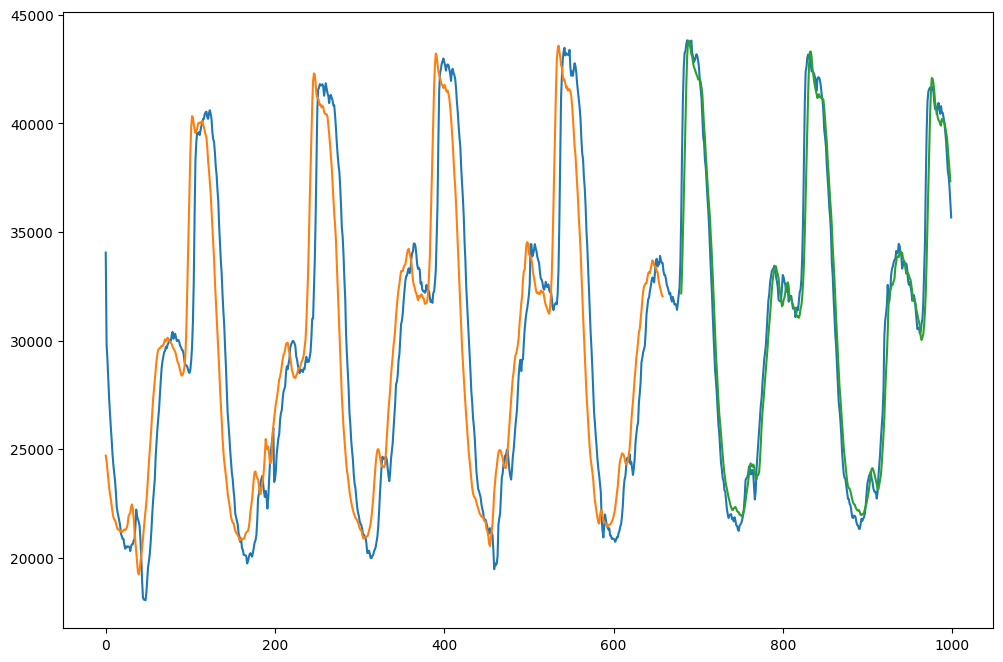

In [ ]:
%matplotlib inline


# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)



dataset = dataSV.values.reshape(-1, 1)  # convert to numpy and mak3 2d array
dataset = dataset.astype('float32')


# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]



# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


# create and fit the LSTM network
model3 = Sequential()
model3.add(LSTM(8, input_shape=(1,look_back)))
#model3.add(LSTM(1, input_shape=(1,look_back)))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam')
model3.fit(trainX, trainY, epochs=5, batch_size=5, verbose=1)

# make predictions
trainPredict = model3.predict(trainX)
testPredict = model3.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredict)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
feature_names=["LB1","LB2","LB3","LB4","LB5","LB6","LB7","LB8","LB9","LB10"]


xplainer = lime.lime_tabular.RecurrentTabularExplainer(training_data=trainX, mode='regression', feature_names=feature_names)

exp = xplainer.explain_instance(testX[0], model3.predict, num_features=10, labels=(1,))
exp.show_in_notebook(show_all=True)

157/157 [==============================] - 0s 2ms/step


## NLP

Note we had to move to RandomForest classifier

In [ ]:
import sklearn
import sklearn.ensemble
import sklearn.metrics

#Raw dataset
X, y = shap.datasets.imdb()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

print(X_train[0])
print(y_train[0])

y_train=y_train[:1000]
y_test=y_test[:1000]
X_train = X_train[:1000]
X_test = X_test[:1000]

vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(min_df=10)
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()

class_names = ['Negative', 'Positive']

rf = sklearn.ensemble.RandomForestClassifier(n_estimators=500)
rf.fit(X_train_vec, y_train)

pred = rf.predict(X_test_vec)

print(pred[0])

The movie is a total crap. We have two good actors who are miscast and a meat-head of an actor Salman Khan just to attract the female audience. The story is a crap. The characters poorly sketched. Non existent story telling. No editing to speak of. Ajay Devgan as a Rock Star..that is a dream in itself. The movie drags along to the point of decadence. The whole charade about Arjun bringing his Manna to London, let him grope his girlfriend and let him not play at Wembley (Vimbley in the dubbing process) is absurd. Salman Khan's over the top acting or faking is too painful to watch. I remember seeing some good movies from this Producer Vipul Shah but this is not one of them. It seems all the good directors are falling prey to the Box Office mania..that the Mumbai Media Morons have created. This is yet another crap movie in the lines of "Wanted" with idiot actor like Salman Khan who has no place in a Good Hindi Cinema. He is good to the Indian Cinema as Titanic was to the Winter Cruise Bus

### Lime

Adapted from:
https://github.com/marcotcr/lime/blob/master/doc/notebooks/Lime%20-%20basic%20usage%2C%20two%20class%20case.ipynb

In [ ]:
from sklearn.pipeline import make_pipeline
c = make_pipeline(vectorizer, rf)

print(c.predict_proba([X_test[0]]))

[[0.66 0.34]]


In [ ]:
from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=class_names)

In [ ]:
i = 1
exp = explainer.explain_instance(X_test[i], c.predict_proba, num_features=10)
print('Probability =', c.predict_proba([X_test[i]])[0, 1])
print('True class: %s' % class_names[y_test[i]])

Probability = 0.548
True class: Positive


In [ ]:
exp.as_list()

[('acting', -0.04854150225157517),
 ('no', -0.035136408785273465),
 ('as', 0.02995344807679014),
 ('There', -0.02307095306239957),
 ('been', -0.019824801016662355),
 ('decent', -0.01949109821637331),
 ('well', 0.019086771085320198),
 ('very', 0.01094307565987191),
 ('moving', 0.009334303842269678),
 ('in', 0.008711192327330225)]

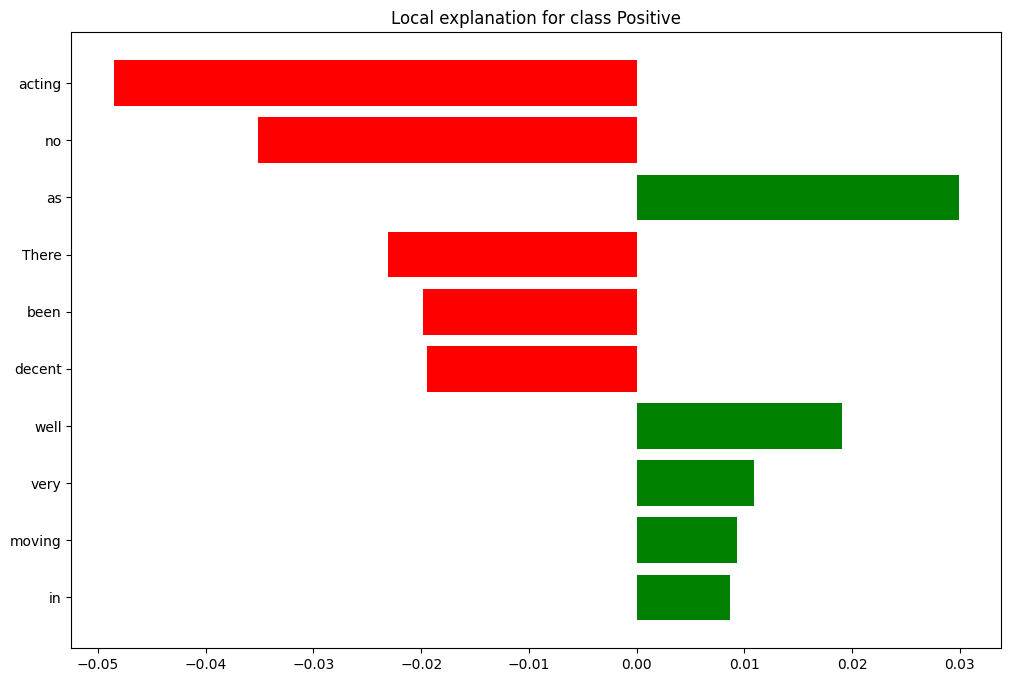

In [ ]:
%matplotlib inline
fig = exp.as_pyplot_figure()

In [ ]:
exp.show_in_notebook(text=True)

### Shap

Note: Can take some time

In [ ]:
feature_names = vectorizer.get_feature_names_out()
explainer = shap.Explainer(rf, X_train_vec, feature_names=feature_names)
shap_values = explainer(X_test_vec)
print(shap_values.values.shape) # (5000, 16438, 2)

100%|===================| 1993/2000 [01:35<00:00]        

(1000, 1940, 2)


"Panic in the Streets" was a decent thriller, but I felt a bit disappointed by it. The central theme of a city being attacked by a plague in modern times is fascinating, but the film never really explores or develops it. Its well made and entertaining, but its not as interesting as it should have been. The screenplay for this one is really weak and brings the whole film down. None of the central characters are really compelling or believable.<br /><br />Fortunately, the film is very well made so it compensates for the weak scripting. The direction by Elia Kazan keeps the film suspenseful and moving at a lightning quick pace. There are some standout sequences, particularly the memorable chase climax. When his direction was combined with better screenplays several years later, the man could mostly do no wrong.<br /><br />The acting is also very good. Richard Widmark was always a watchable leading man and does what he can with an underwritten character. Paul Douglas spends his time yellin

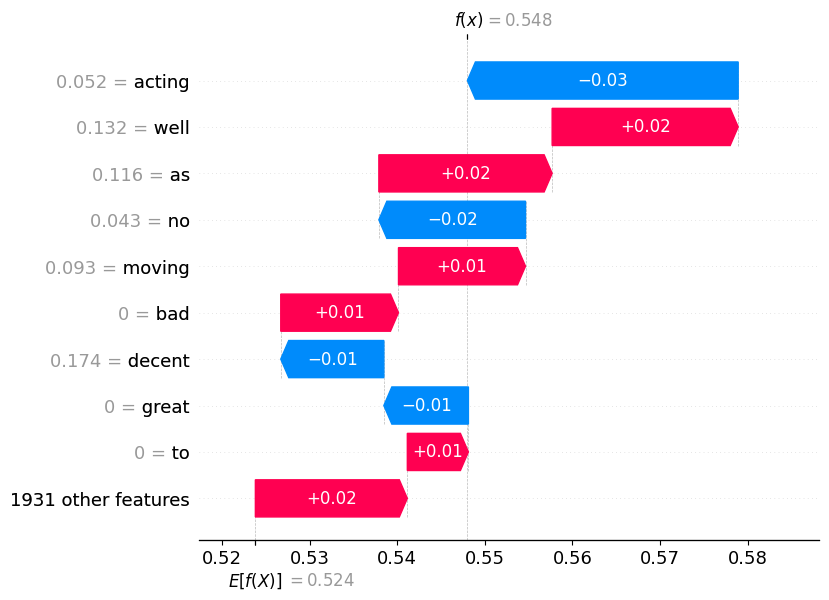

In [ ]:
shap.initjs()

i = 1
print(X_test[i])


shap.plots.waterfall(shap_values[i,:,1])